In [1]:
# Imports

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans, DBSCAN
import os
from scipy.signal import find_peaks

(4, 1500)


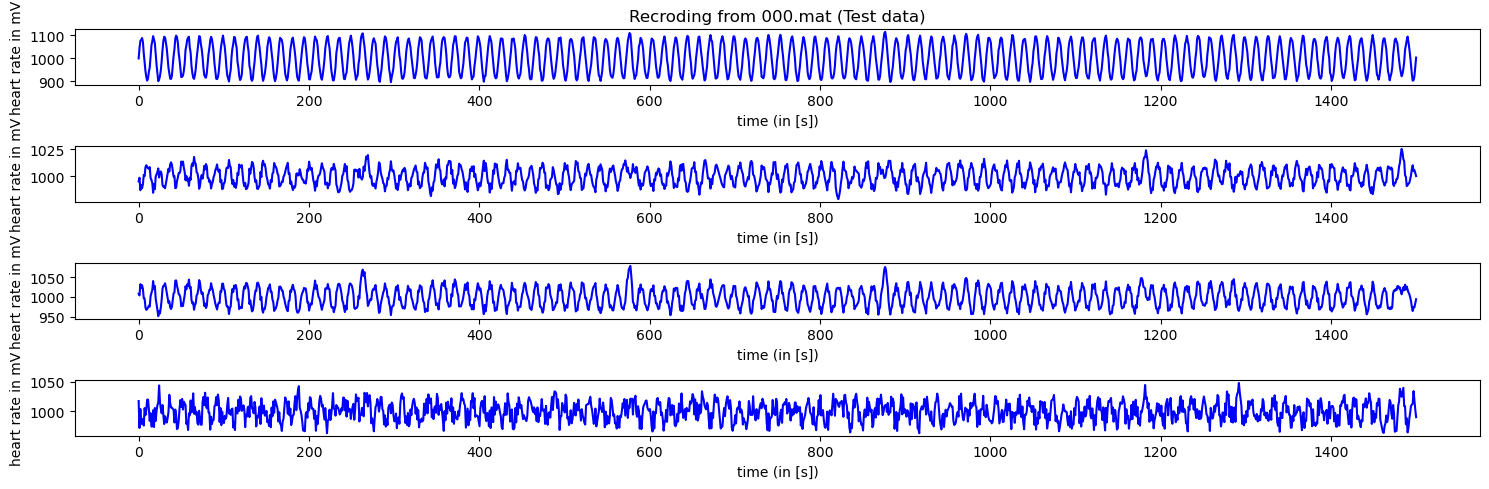

In [84]:
# Load data
mat_file_test_000 = loadmat('data/test-data/000.mat')

data00 = mat_file_test_000['val'].reshape(4,-1)

print(data00.shape)

fig, ax = plt.subplots(4,1, figsize=(15,5))


x = np.linspace(0, data00.shape[1], data00.shape[1])

for i in range(0,4):
    ax[i].plot(x, data00[i, :], color='blue', label=f'electrode {i}')
    ax[i].set_xlabel('time (in [s])')
    ax[i].set_ylabel('heart rate in mV')

ax[0].set_title('Recroding from 000.mat (Test data)')


plt.tight_layout()
plt.show()



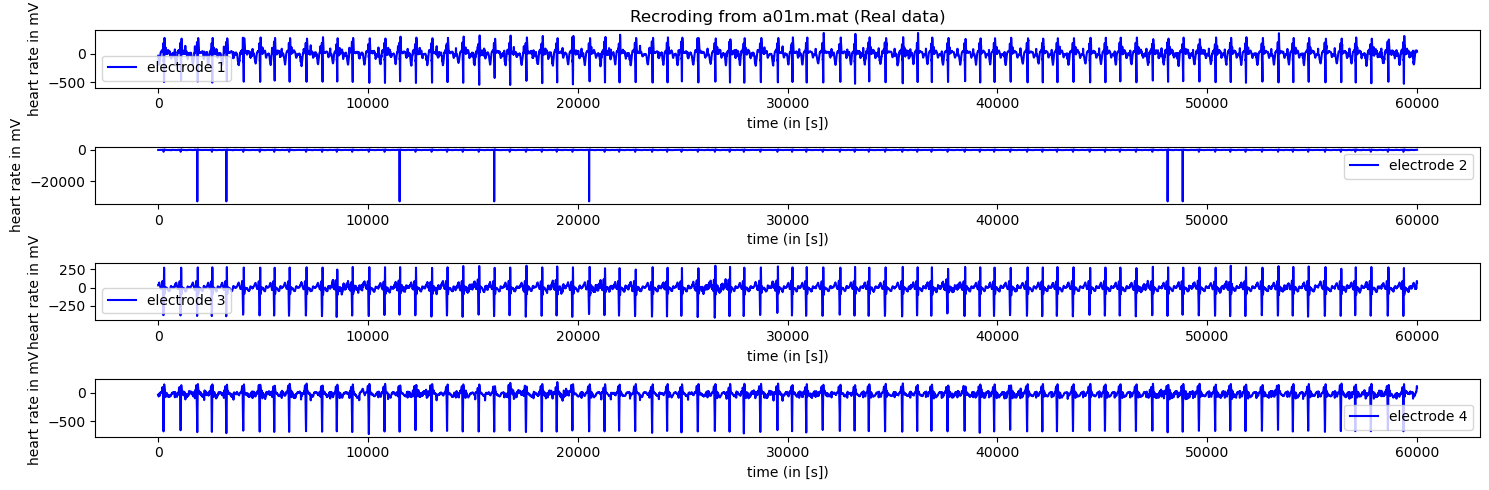

In [3]:
# Load data
mat_file_real_a01m = loadmat('data/real-data/a01m.mat')

data_r_01 = mat_file_real_a01m['val'].reshape(4,-1)

fig, ax = plt.subplots(4,1, figsize=(15,5))


x = np.linspace(0, data_r_01.shape[1], data_r_01.shape[1])

for i in range(0,4):
    ax[i].plot(x, data_r_01[i, :], color='blue', label=f'electrode {i+1}')
    ax[i].set_xlabel('time (in [s])')
    ax[i].set_ylabel('heart rate in mV')
    ax[i].legend()

ax[0].set_title('Recroding from a01m.mat (Real data)')


plt.tight_layout()
plt.show()

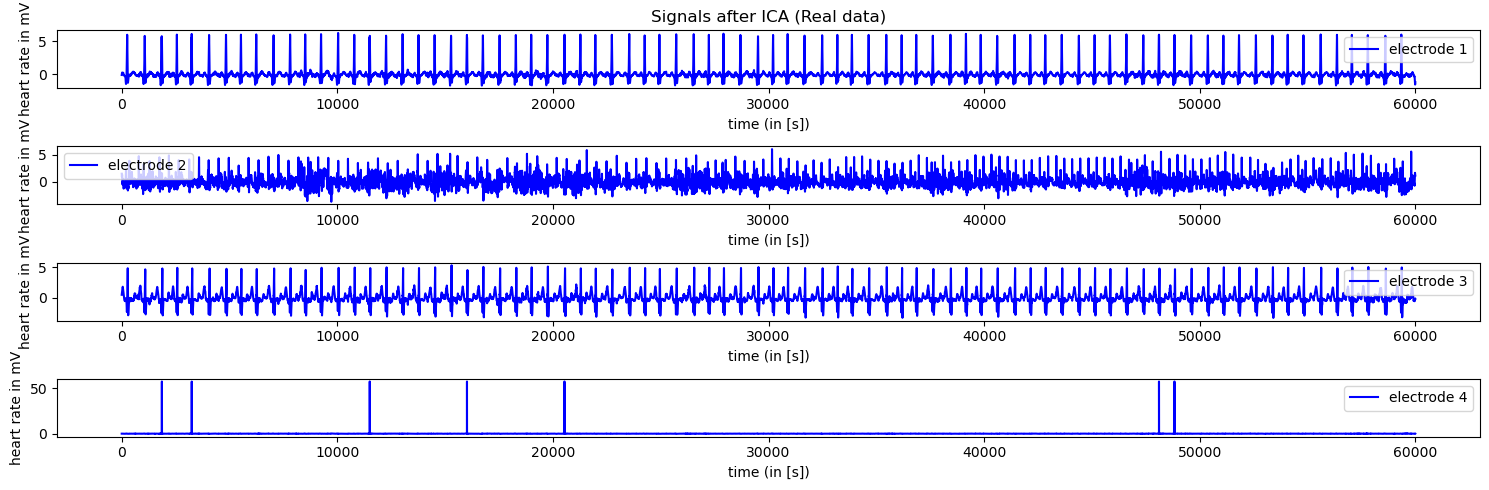

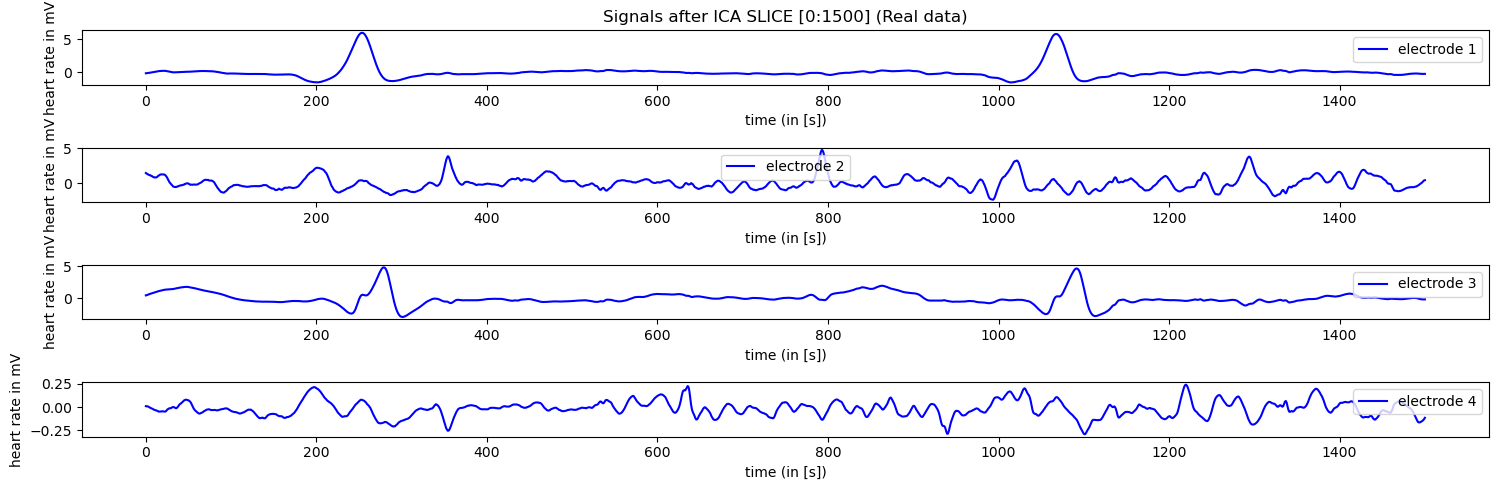

In [78]:
decomposed_data = FastICA(n_components=4).fit_transform(data_r_01.T).T

fig, ax = plt.subplots(4,1, figsize=(15,5))


x = np.linspace(0, decomposed_data.shape[1], decomposed_data.shape[1])

for i in range(0,4):
    ax[i].plot(x, decomposed_data[i, :], color='blue', label=f'electrode {i+1}')
    ax[i].set_xlabel('time (in [s])')
    ax[i].set_ylabel('heart rate in mV')
    ax[i].legend()

ax[0].set_title('Signals after ICA (Real data)')

plt.tight_layout()
plt.legend()
plt.show()


slice_start = 0
slice_end = 1500

fig, ax = plt.subplots(4,1, figsize=(15,5))


x = np.linspace(0, slice_end-slice_start, slice_end-slice_start)

for i in range(0,4):
    ax[i].plot(x, decomposed_data[i, :][slice_start:slice_end], color='blue', label=f'electrode {i+1}')
    ax[i].set_xlabel('time (in [s])')
    ax[i].set_ylabel('heart rate in mV')
    ax[i].legend()

ax[0].set_title(f'Signals after ICA SLICE [{slice_start}:{slice_end}] (Real data)')
plt.tight_layout()
plt.show()

# Identify Maternal and Fetal Heatbeat
## Fast Fourier Transform to remove the 2 noise signals

The next step is to analyze the period in the different signals. We expect the mothers' and fetous' hertbeat to have a distinct and similar pattern, while the noise deviates from this shape. 

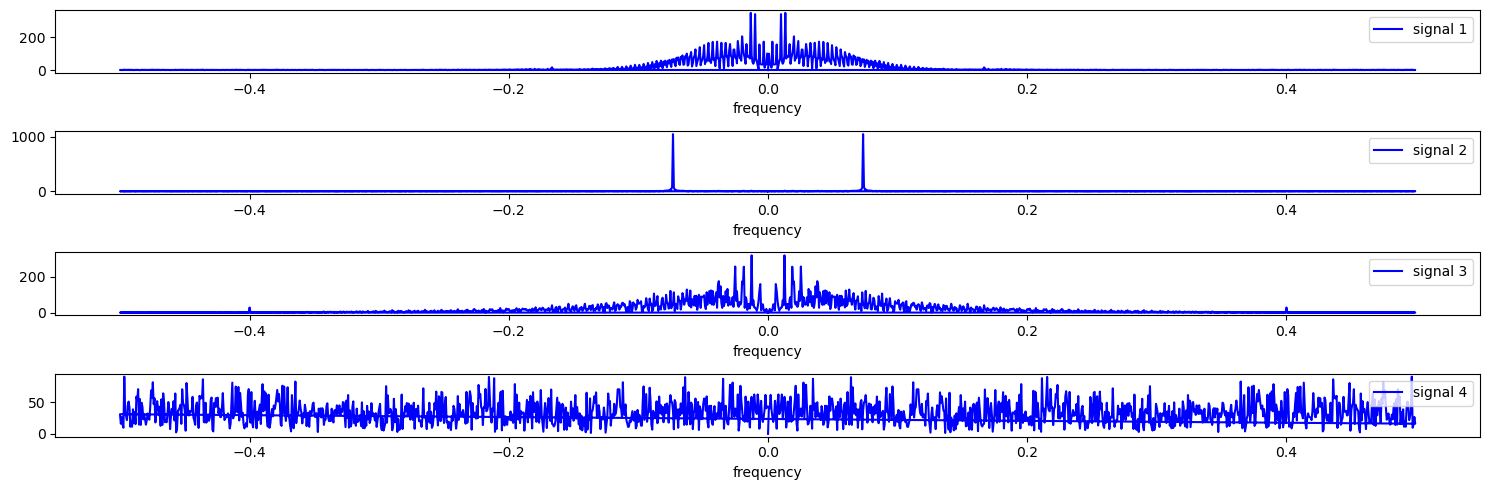

In [79]:
%matplotlib inline

decomposed_data = FastICA(n_components=4).fit_transform(data00.T).T

fft_out = np.fft.fft(decomposed_data, axis=1)
fft_freq = np.fft.fftfreq(decomposed_data.shape[1])



fig, ax = plt.subplots(4,1, figsize=(15,5))

for i in range(0,4):
    ax[i].plot(fft_freq, np.abs(fft_out[i, :]), color='blue', label=f'signal {i+1}')
    ax[i].set_xlabel('frequency')
    ax[i].set_ylabel('')
    ax[i].legend()

plt.tight_layout()
plt.show()

We can observe that there are two signals with a fairly regular pattern and two which heavily deviate from this. (both directions)

### Naive: Sum of signals

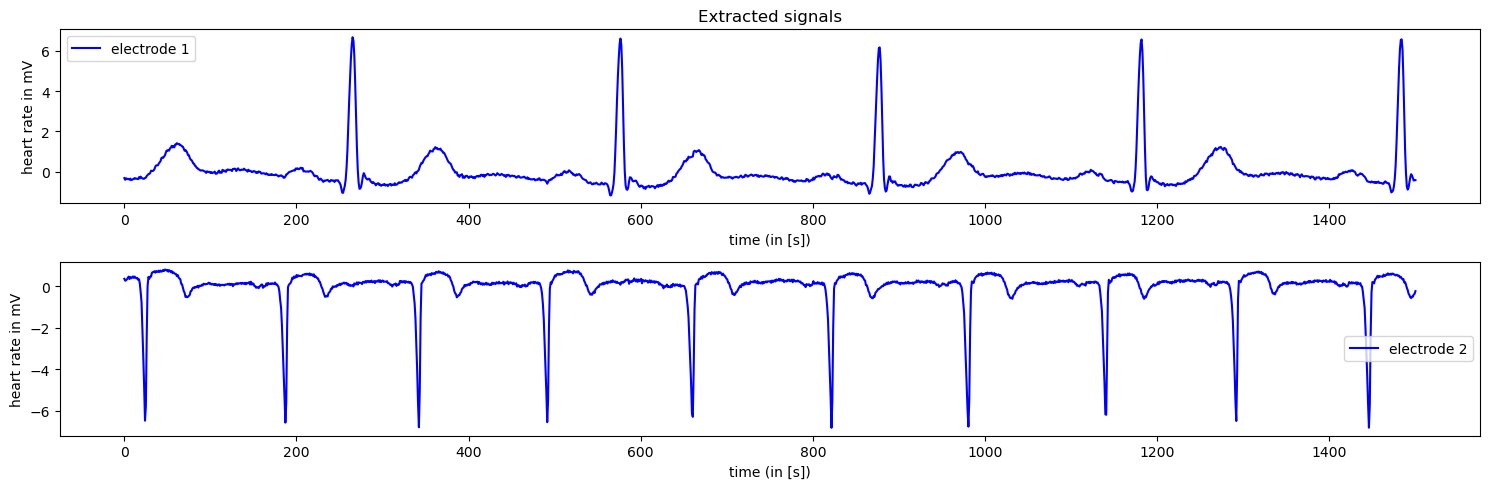

In [80]:
sum_of_signals = np.abs(fft_out.sum(axis=1))


idx_heatbeats = np.argsort(sum_of_signals)[1:3]

middle_1 = np.sort(sum_of_signals)[1]
middle_2 = np.sort(sum_of_signals)[2]

heartbeats = decomposed_data[idx_heatbeats]

fig, ax = plt.subplots(2,1, figsize=(15,5))

for i in range(0,2):
    ax[i].plot(x, heartbeats[i, :], color='blue', label=f'electrode {i+1}')
    ax[i].set_xlabel('time (in [s])')
    ax[i].set_ylabel('heart rate in mV')
    ax[i].legend()
    
ax[0].set_title(f'Extracted signals')

plt.tight_layout()
plt.show()


# Everything from above modularized
This function takes a file path and returns the heartbeats from the mixed signal

In [3]:
def extract_heatbeats(filename):
    # Open file
    mat_file = loadmat(filename)
    data = mat_file['val'].reshape(4,-1)
    print(data.shape)
    
    
    # ICA to extract signals from mixture
    decomposed_data = FastICA(n_components=4).fit_transform(data.T).T
    
    # FFT to distinguish heartbeat and noise
    fft_out = np.fft.fft(decomposed_data, axis=1)
    sum_of_signals = np.abs(fft_out.sum(axis=1))
    
    idx_heatbeats = np.argsort(sum_of_signals)[1:3]
    heartbeats = decomposed_data[idx_heatbeats]
    
    return heartbeats


directory = 'data/test-data'

all_test_heartbeats =[]

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        if filename.endswith('.mat'):
            heartbeats = extract_heatbeats(file_path)
            for h in heartbeats:
                all_test_heartbeats.append(h)
        
    
    

(4, 1370)
(4, 2050)
(4, 1554)
(4, 1080)
(4, 1978)
(4, 1950)
(4, 2035)
(4, 1589)
(4, 2176)
(4, 1419)
(4, 1360)
(4, 1399)
(4, 1992)
(4, 1710)
(4, 1892)
(4, 2050)
(4, 1865)
(4, 1566)
(4, 1235)
(4, 1760)
(4, 1577)
(4, 1379)
(4, 2560)
(4, 2348)
(4, 2145)
(4, 1554)
(4, 2331)
(4, 1852)
(4, 2523)
(4, 1522)
(4, 1511)
(4, 1379)
(4, 1600)
(4, 2417)
(4, 1566)
(4, 2145)
(4, 2542)
(4, 1500)
(4, 2452)
(4, 1566)
(4, 2080)
(4, 1360)
(4, 1662)
(4, 1419)
(4, 2035)
(4, 1589)
(4, 1379)
(4, 1350)
(4, 1748)
(4, 2240)
(4, 1879)
(4, 2065)
(4, 1698)
(4, 2145)
(4, 2331)
(4, 2224)
(4, 1262)
(4, 2266)
(4, 1992)
(4, 2176)
(4, 2400)
(4, 1511)
(4, 2250)
(4, 2240)
(4, 1419)
(4, 1686)
(4, 2065)
(4, 1651)
(4, 2434)
(4, 1244)
(4, 2065)
(4, 2298)
(4, 1235)
(4, 1500)
(4, 1350)
(4, 2348)
(4, 1839)
(4, 2065)
(4, 1543)
(4, 1992)
(4, 1554)
(4, 2035)
(4, 2176)
(4, 1892)
(4, 1430)
(4, 1748)
(4, 1906)
(4, 1419)
(4, 2224)
(4, 1722)
(4, 2605)
(4, 1409)
(4, 2224)
(4, 1698)
(4, 1399)
(4, 2160)
(4, 2208)
(4, 2250)
(4, 1440)
(4, 1577)


## Identify Irregular Signals

The irregularity is in the period of the signal.

Naive attempt: Thresholding to detect maximum of the signals, Calculate difference between spikes (period length), Varaince should be low for regular heartbeat\
Why naive: We cannot really make assumptions on how a healthy heartbeat period looks. Depending on the state of the person there might be varying periods.

In [ ]:
heartbeats = extract_heatbeats('data/test-data/000.mat')

peaks, _ = find_peaks(heartbeats[0])

distance_between_peaks = []
for i in range(1, len(peaks)):
    distance_between_peaks.append(peaks[i] - peaks[i-1])
    
variance = np.array(distance_between_peaks).var()
std = np.array(distance_between_peaks).std()
mean = np.array(distance_between_peaks).mean()


print(peaks)
print(distance_between_peaks)
print(variance)
print(std)
print(mean)


(4, 1500)
(4, 2365)
(4, 1760)
(4, 1235)
(4, 2523)
(4, 1852)
(4, 1522)
(4, 2080)
(4, 2176)
(4, 1350)
(4, 1686)
(4, 1554)
(4, 2348)
(4, 2400)
(4, 2250)
(4, 1262)
(4, 1409)
(4, 1511)
(4, 1577)
(4, 1235)
(4, 2160)
(4, 1978)
(4, 2240)
(4, 2065)
(4, 1379)
(4, 1080)
(4, 2176)
(4, 2469)
(4, 1589)
(4, 1710)
(4, 1722)
(4, 1409)
(4, 1651)
(4, 2240)
(4, 2331)
(4, 1600)
(4, 1865)
(4, 2224)
(4, 1992)
(4, 1978)
(4, 1566)
(4, 2224)
(4, 2434)
(4, 2176)
(4, 1566)
(4, 2417)
(4, 2400)
(4, 1710)
(4, 1760)
(4, 1554)
(4, 1577)
(4, 1379)
(4, 1360)
(4, 1600)
(4, 1710)
(4, 2208)
(4, 1978)
(4, 2224)
(4, 2452)
(4, 2331)
(4, 1370)
(4, 2298)
(4, 2145)
(4, 1350)
(4, 2160)
(4, 2115)
(4, 1698)
(4, 1379)
(4, 2035)
(4, 2469)
(4, 2400)
(4, 1748)
(4, 1589)
(4, 2560)
(4, 2224)
(4, 1419)
(4, 1554)
(4, 1992)
(4, 1589)
(4, 1370)
(4, 2348)
(4, 1500)
(4, 2050)
(4, 1350)
(4, 1566)
(4, 2080)
(4, 1813)
(4, 1748)
(4, 1419)
(4, 2065)
(4, 1964)
(4, 1992)
(4, 1662)
(4, 1554)
(4, 2145)
(4, 2400)
(4, 1543)
(4, 1978)
(4, 2176)
(4, 1839)


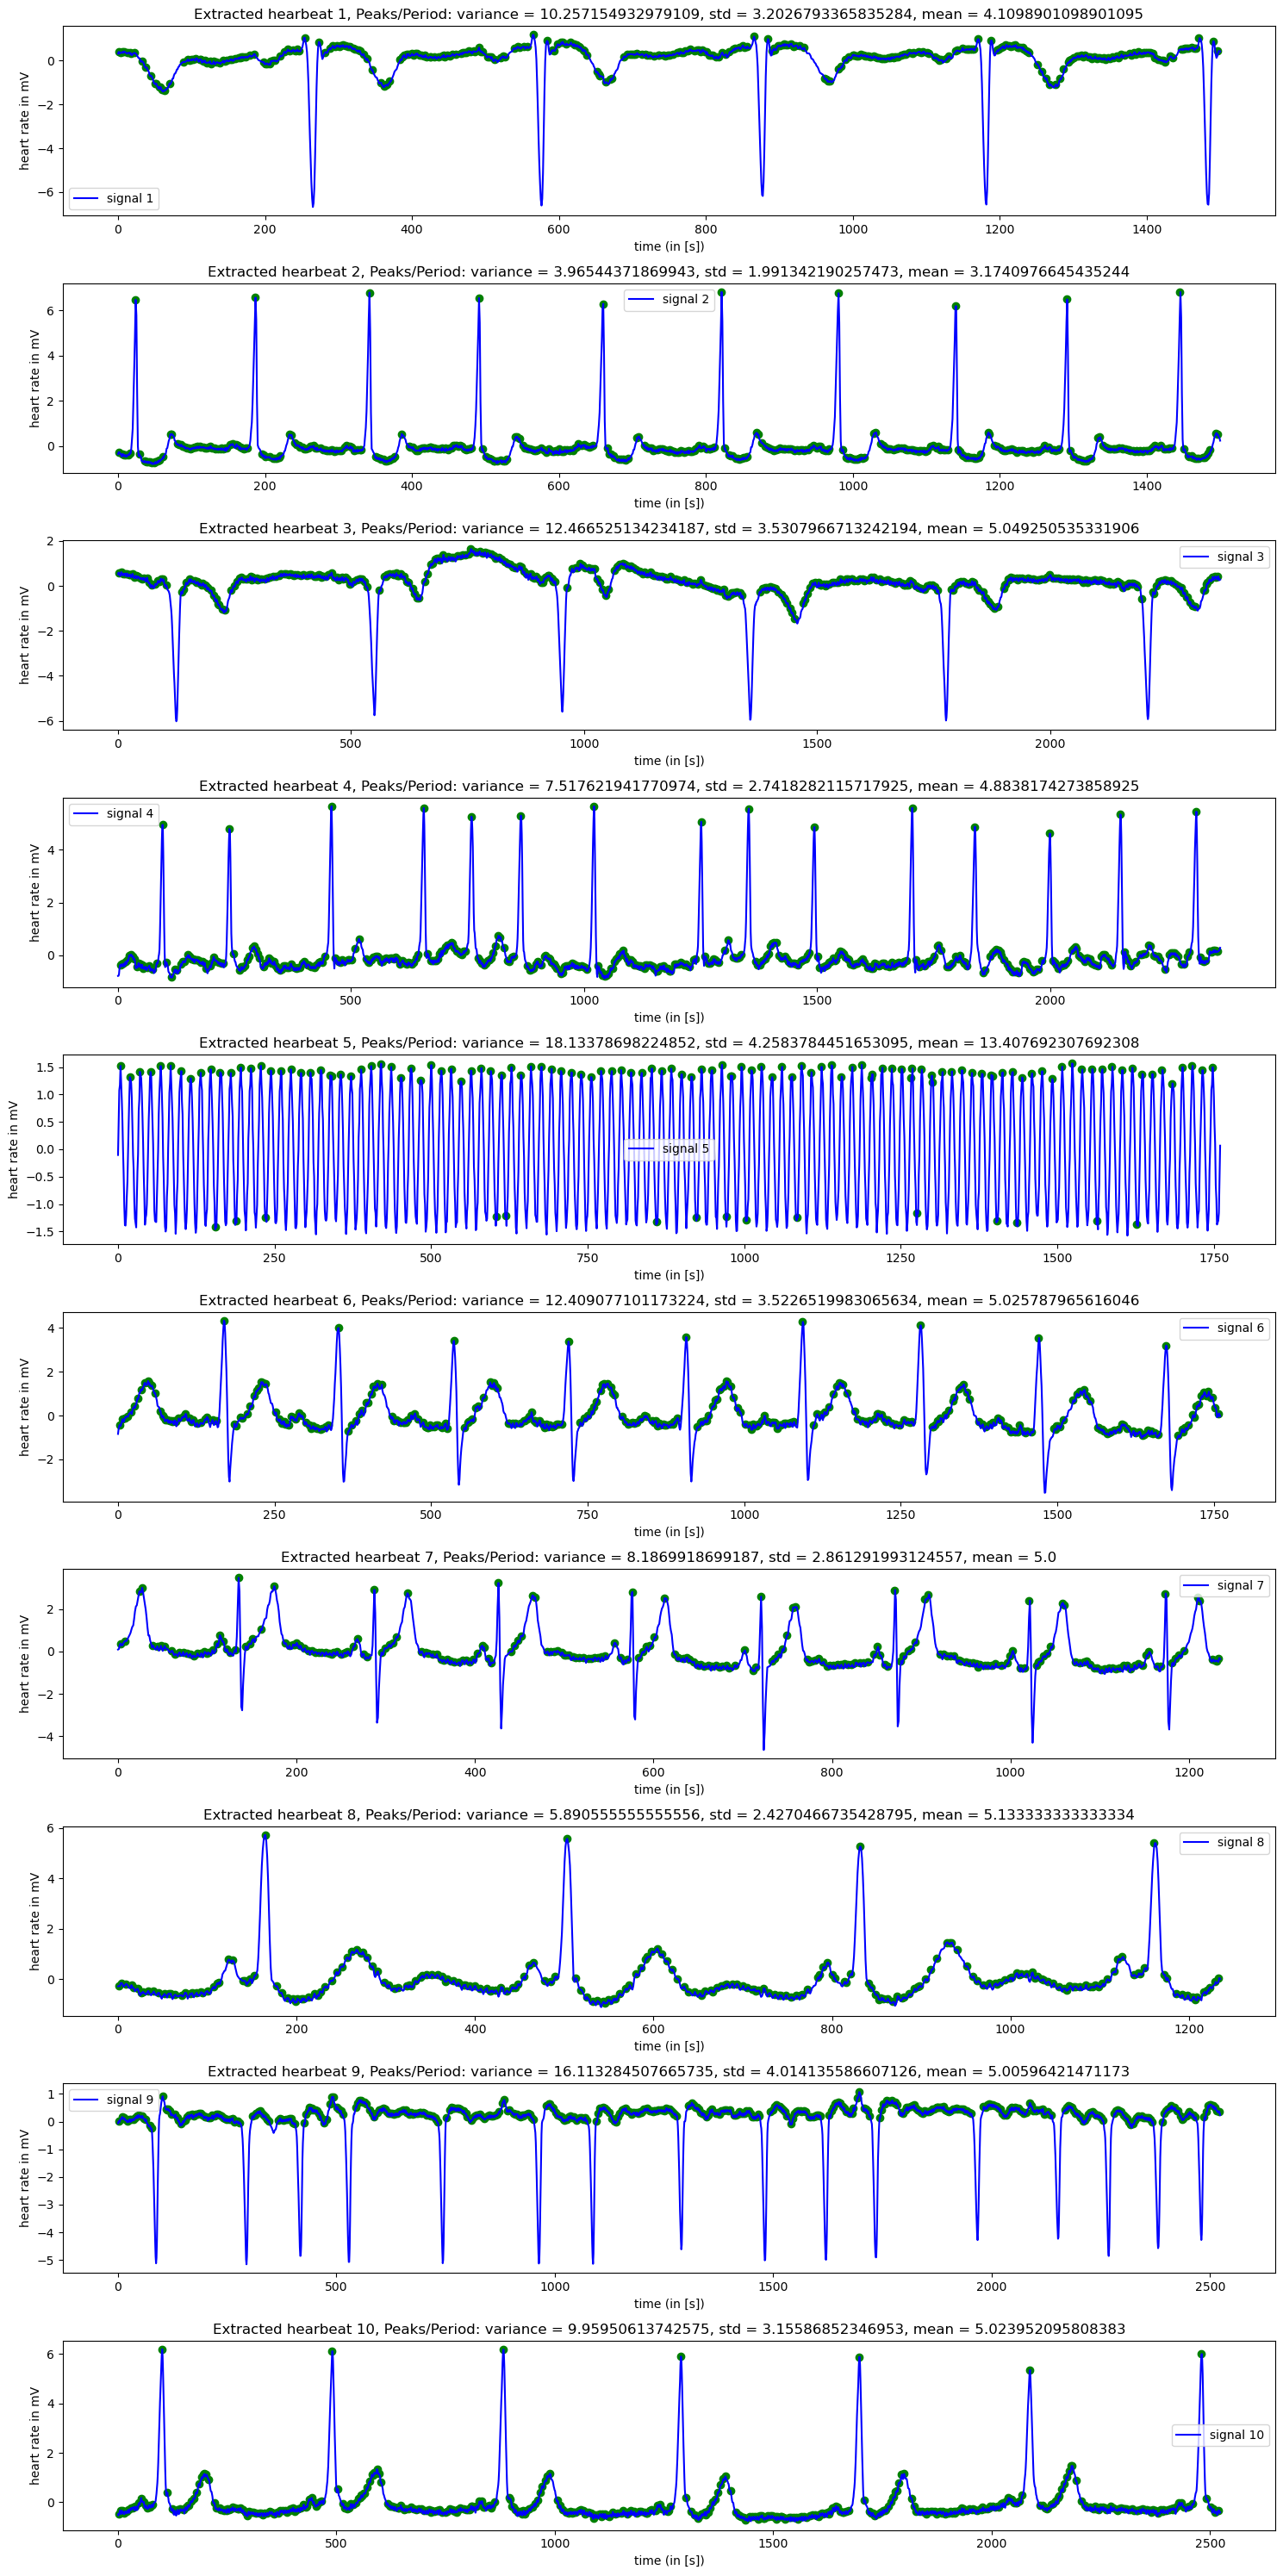

In [4]:
directory = 'data/test-data'

all_test_heartbeats =[]

for filename in sorted(os.listdir(directory)):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        if filename.endswith('.mat'):
            heartbeats = extract_heatbeats(file_path)
            for h in heartbeats:
                all_test_heartbeats.append(h)
                
_from = 0
_to = 10

fig, ax = plt.subplots(_to-_from,1, figsize=(15,30))

for idx, heartbeat in enumerate(all_test_heartbeats[_from:_to]):
    x = np.linspace(0, heartbeat.shape[0], heartbeat.shape[0])
    
    peaks, _ = find_peaks(heartbeat)

    distance_between_peaks = []
    for i in range(1, len(peaks)):
        distance_between_peaks.append(peaks[i] - peaks[i-1])
        
    variance = np.array(distance_between_peaks).var()
    std = np.array(distance_between_peaks).std()
    mean = np.array(distance_between_peaks).mean()
    
    ax[idx].plot(x, heartbeat, color='blue', label=f'signal {idx+1}')
    ax[idx].scatter(peaks, heartbeat[peaks], color='green')
    
    ax[idx].set_xlabel('time (in [s])')
    ax[idx].set_ylabel('heart rate in mV')
    ax[idx].legend()
    ax[idx].set_title(f'Extracted hearbeat {idx+ 1 + _from}, Peaks/Period: variance = {variance}, std = {std}, mean = {mean}')

plt.tight_layout()
plt.show()
    

### Clustering 
Assume that the majority of data points / heartbeats are regular and that they are forming a large cluster. \
Find outliers from such a cluster, or that form smaller clusters\

One issue here could be that the maternal and fetal signal are different from the beginning (fetal is faster); No idea if this is actually true


Maybe a GMM clustering would be usefull. Then we have probabilities that a hearbeat is regular and not

DBSCAN could actually work better

# Clustering

Hwo do different clustering algorithms look like --> How do the identified clusters come together (this is actually very different)
kmeans will identify as many clusters as you tell it to find this means that there are not really outliers there -- clearly distributed clusters
dbscan can identify clusters of points that are not necessarily centred around a point, it relies on the distance between the data points
gmm gives probability for points to belong to a cluster -- basicly finds the probability distributions (they can merge) meaning a point can belong to two clusters or more